In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
csv = pd.read_csv("iconic_songs_dataset.csv")

In [83]:
df = pd.DataFrame(csv)
df.rename(columns={
    "Title": "Título", 
    "Artist": "Artista", 
    "Genre": "Gênero", 
    "ReleaseDate": "Data de Lançamento", 
    "Duration": "Duração", 
    "Album": "Álbum", 
    "Popularity": "Popularidade",
    }, inplace=True)
df.head()

,Título,Artista,Gênero,Data de Lançamento,Duração,Álbum,Popularidade
0,Blinding Lights,The Weeknd,Pop,2024-01-05,3:22,After Hours,95
1,Levitating,Dua Lipa,Pop,2024-01-14,3:23,Future Nostalgia,93
2,Peaches,Justin Bieber ft. Daniel Caesar & Giveon,Pop,2024-02-12,3:18,Justice,91
3,Save Your Tears,The Weeknd,Pop,2024-02-18,3:36,After Hours,92
4,Good 4 U,Olivia Rodrigo,Pop,2024-03-05,2:58,SOUR,94


# **Quais gêneros musicais têm a maior popularidade média em 2024?**

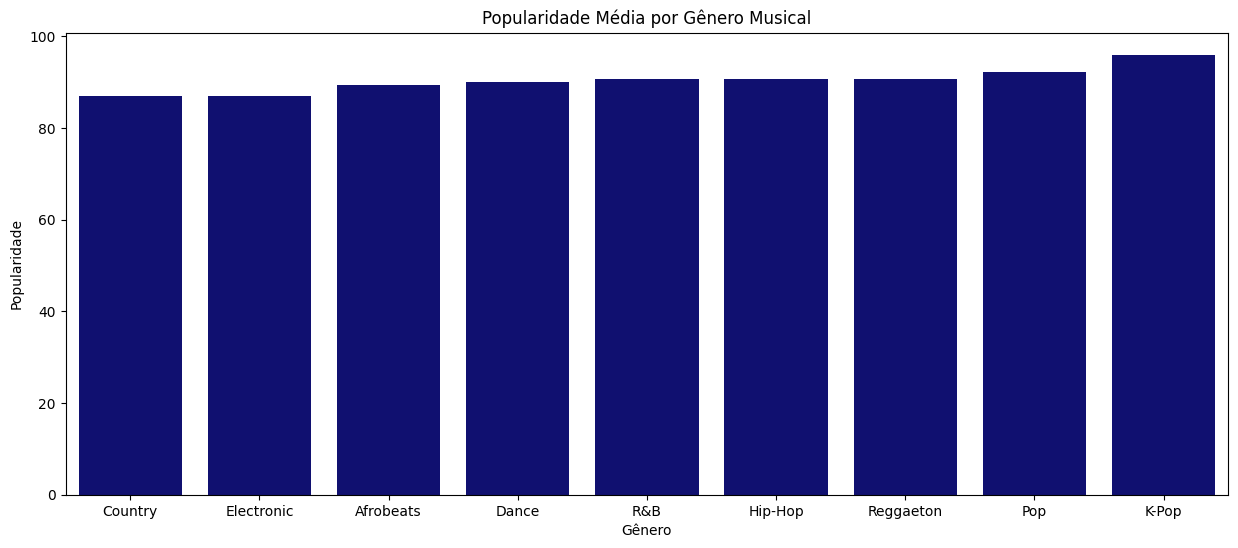

In [114]:
# Agrupando por gênero e obtendo a média de popularidade por gênero
popularidade_por_genero = df.groupby('Gênero')['Popularidade'].mean().reset_index()
popularidade_por_genero = popularidade_por_genero.sort_values(by=["Popularidade"])

# Plotando a popularidade/gênero
plt.figure(figsize=(15, 6))
plt.title('Popularidade Média por Gênero Musical')
sns.barplot(data=popularidade_por_genero, x='Gênero', y='Popularidade', color= 'navy')
plt.show()


# **Existe uma correlação entre a duração da música e sua popularidade?**

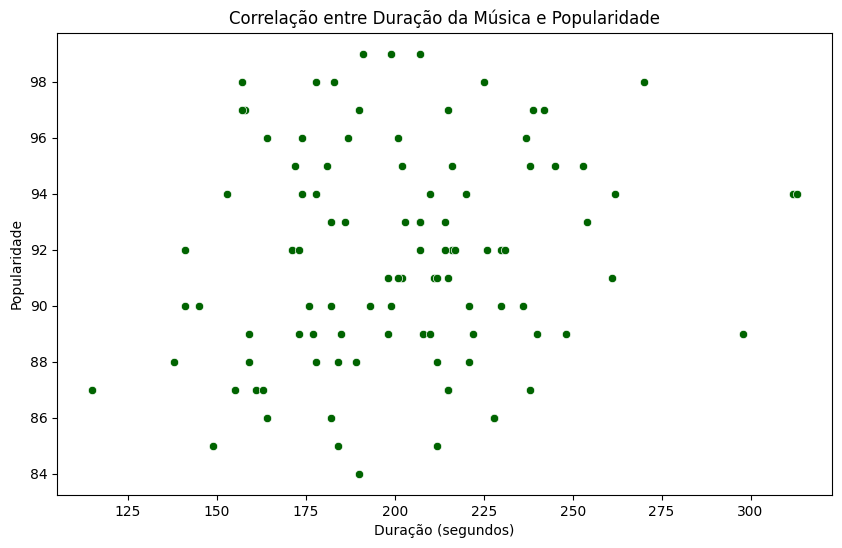

In [120]:
# convertendo a duração da canção em segundos
df[['Minutos', 'Segundos']] = df['Duração'].str.split(':', expand=True)

# convertendo as colunas para inteiros
df['Minutos'] = df['Minutos'].astype(int)
df['Segundos'] = df['Segundos'].astype(int)

# calculando a duração em segundos
df['Duração (segundos)'] = df['Minutos'] * 60 + df['Segundos']

# removendo as colunas criadas para calcular os segundos
df.drop(columns=['Minutos', 'Segundos'], inplace=True)

plt.figure(figsize=(10, 6))
plt.title('Correlação entre Duração da Música e Popularidade')
sns.scatterplot(data=df, x='Duração (segundos)', y='Popularidade', color="darkgreen")
plt.show()



In [58]:
correlacao = df[['Duração (segundos)', 'Popularidade']].corr()
correlacao

,Duração (segundos),Popularidade
Duração (segundos),1.000000,0.154285
Popularidade,0.154285,1.000000


# **Qual a distribuição da popularidade das músicas por mês de lançamento?**

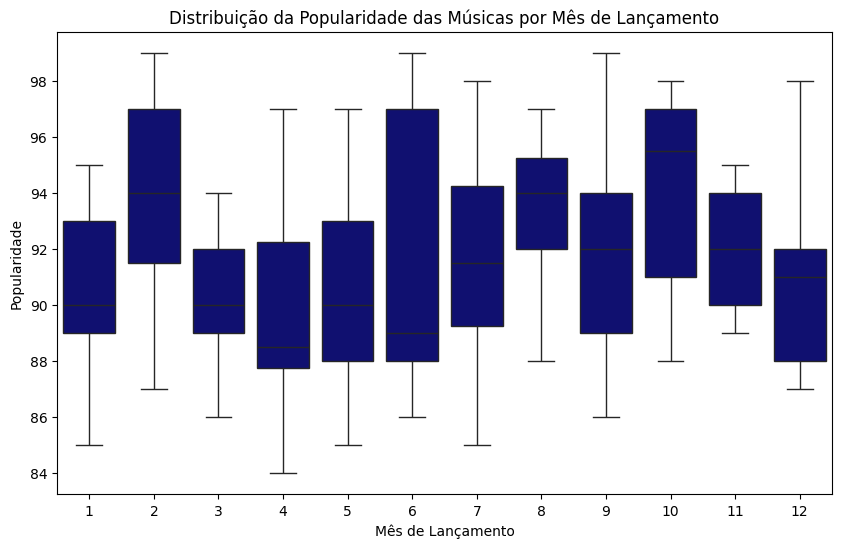

In [121]:
df['Mês de Lançamento'] = pd.to_datetime(df['Data de Lançamento']).dt.month
plt.figure(figsize=(10, 6))
plt.title("Distribuição da Popularidade das Músicas por Mês de Lançamento")
sns.boxplot(data=df, x='Mês de Lançamento', y='Popularidade', color='navy')
plt.show()

# **Quais artistas têm a maior quantidade de músicas no dataset e qual a popularidade média dessas músicas?**

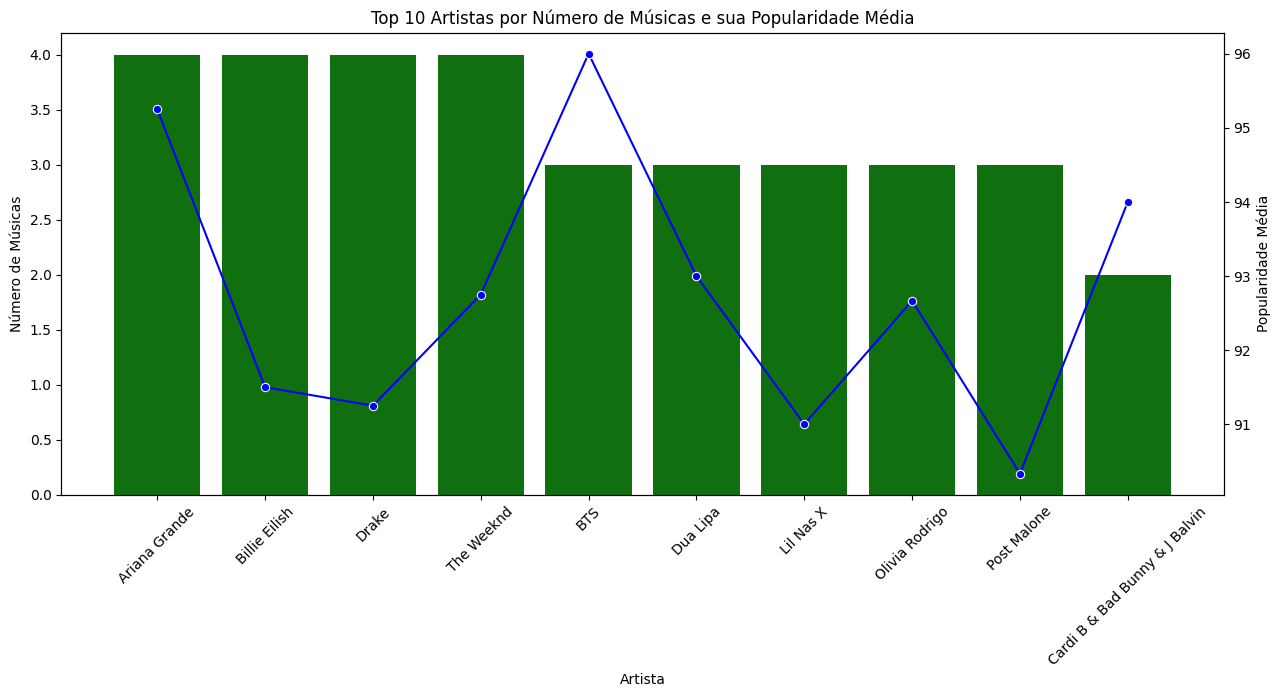

In [124]:
# agrupando artistas por música
musicas_artista = df.groupby('Artista').size().reset_index(name='Número de Músicas')
# agrupando artistas por popularidade média
popularidade_media_artista = df.groupby('Artista')['Popularidade'].mean().reset_index(name='Popularidade Média')

# fazendo merge das séries
artistas_merge = pd.merge(musicas_artista, popularidade_media_artista, on='Artista')

# top 10 artistas
top_artistas = artistas_merge.nlargest(10, 'Número de Músicas')

# plotando gráficos
fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()
sns.barplot(data=top_artistas, x='Artista', y='Número de Músicas', ax=ax1, color='green')
sns.lineplot(data=top_artistas, x='Artista', y='Popularidade Média', ax=ax2, color='blue', marker='o')
ax1.set_xticks(range(len(top_artistas['Artista'])))
ax1.set_xticklabels(top_artistas['Artista'], rotation=45)
ax1.set_title('Top 10 Artistas por Número de Músicas e sua Popularidade Média')
ax1.set_ylabel('Número de Músicas')
ax2.set_ylabel('Popularidade Média')
plt.show()


# **Quais são os álbuns mais populares e quantas músicas populares eles contêm?**

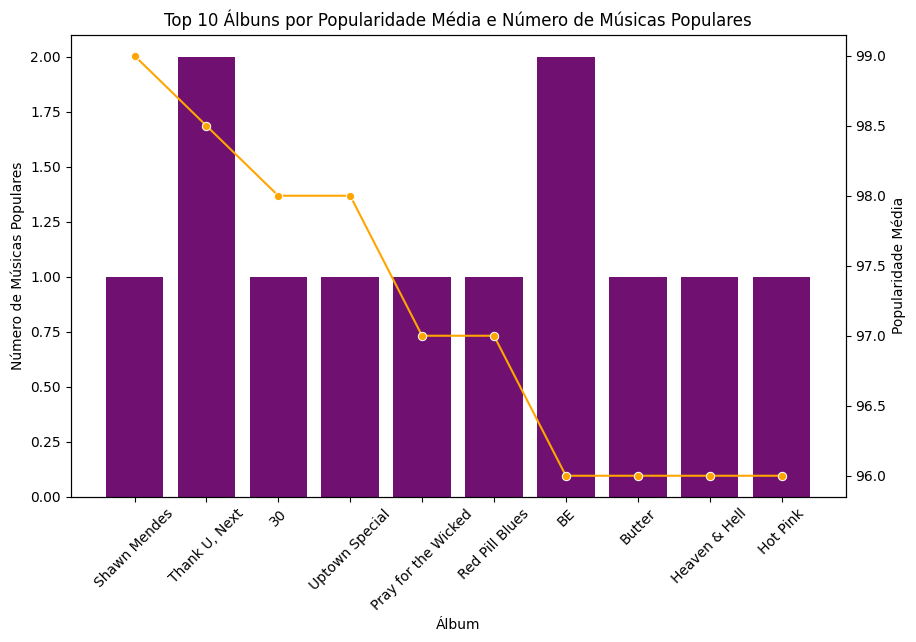

In [123]:
# criando uma serie de musicas mais populares (popularidade > 70)
musicas_mais_populares = df[df['Popularidade'] > 70]

# agrupando por album
popularidade_album = musicas_mais_populares.groupby('Álbum')['Popularidade'].mean().reset_index(name='Popularidade Média')

# agrupando por quantidade de músicas
album_musicas_qtd = musicas_mais_populares.groupby('Álbum').size().reset_index(name='Número de Músicas Populares')

# fazendo merge das séries
albuns_merge = pd.merge(popularidade_album, album_musicas_qtd, on='Álbum')

# top 10 álbuns
top_albums = albuns_merge.nlargest(10, 'Popularidade Média')

# plotando o gráfico
fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()
sns.barplot(data=top_albums, x='Álbum', y='Número de Músicas Populares', ax=ax1, color='purple')
sns.lineplot(data=top_albums, x='Álbum', y='Popularidade Média', ax=ax2, color='orange', marker='o')
ax1.set_xticks(range(len(top_albums['Álbum'])))
ax1.set_xticklabels(top_albums['Álbum'], rotation=45)
ax1.set_title('Top 10 Álbuns por Popularidade Média e Número de Músicas Populares')
ax1.set_ylabel('Número de Músicas Populares')
ax2.set_ylabel('Popularidade Média')
plt.show()